<a href="https://colab.research.google.com/github/tannistha12/ml-house-price-predictor/blob/main/house_price_random_forest_v2/house_price_random_forest_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
target = "SalePrice"
features = [
    "OverallQual","GrLivArea","GarageCars","TotalBsmtSF","1stFlrSF","YearBuilt",
    "FullBath","TotRmsAbvGrd","Fireplaces","GarageArea","MasVnrArea","BsmtFinSF1",
    "ExterQual","KitchenQual","LotArea"
]

In [ ]:
data = df[features + [target]].copy()
qual = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}

In [ ]:
for col in ["ExterQual", "KitchenQual"]:
  data[col] = data[col].map(qual)
X = data[features]
y = data[target]

In [ ]:
X = X.fillna(X.median(numeric_only=True))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape, X_test.shape

((1168, 15), (292, 15))

In [ ]:
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
preds = rf.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
print(f"RandomForest → MAE: {mae:,.2f}")
print(f"RandomForest → MSE: {mse:,.2f}")
print(f"RandomForest → RMSE: {rmse:,.2f}")
print(f"RandomForest → R²: {r2:.3f}")

RandomForest → MAE: 17,888.07
RandomForest → MSE: 822,586,446.13
RandomForest → RMSE: 28,680.77
RandomForest → R²: 0.893


In [ ]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

,importance
OverallQual,0.560664
GrLivArea,0.148869
TotalBsmtSF,0.046653
BsmtFinSF1,0.045655
1stFlrSF,0.035115
YearBuilt,0.031565
LotArea,0.030843
GarageArea,0.025988
GarageCars,0.019398
FullBath,0.011789


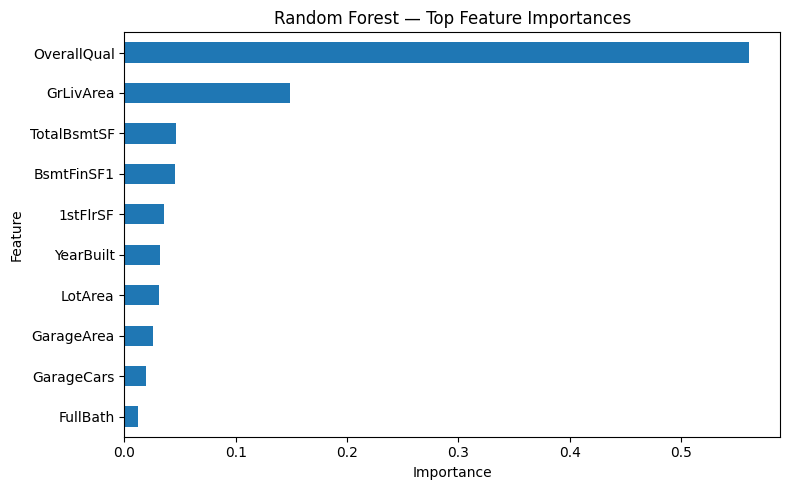

In [ ]:
display(importances.to_frame("importance").head(15))
top_k = 10
plt.figure(figsize=(8,5))
importances.head(top_k).iloc[::-1].plot(kind="barh")
plt.title("Random Forest — Top Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()